### Introduction

* The objective here is to explore publicly available data from LendingClub.com. Lending Club connects people who need money with people who have money.
* An investor would want to invest in people who showed a profile of having a high probability of paying back. The aim is to try to create a model that will help predict this.
* The link to the data: (https://www.lendingclub.com/info/download-data.action)
* Data from 2007-2010 s used to classify and predict whether or not the borrower paid back their loan in full. 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

### Load the data and explore

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


**Here is what the columns represent:**
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion. 
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower.
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).


In [4]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Explore the data through visualizations.

** Histogram of FICO score distribution for each credit policy outcome **

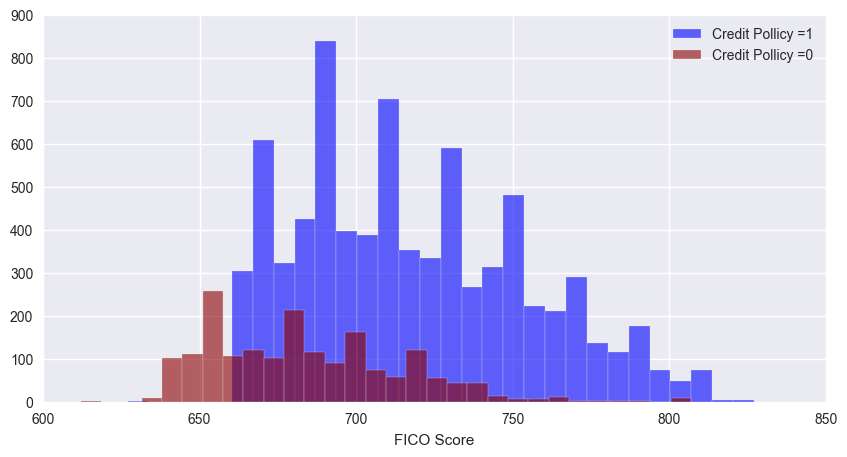

In [37]:
plt.figure(figsize=(9,5))
plt.style.use('seaborn-deep')
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.6,color='blue',bins=30,label='Credit Pollicy =1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.6,color='darkred',bins=30,label='Credit Pollicy =0')
plt.legend()
plt.xlabel('FICO Score')

The following can be observed:
* The number of cases in which credit was approved is much larger than the not approved cases.
* For people with FICO score lower than 660 credit has not been approved.
* Certain FICO scores have more cases than others which could be due to the way FICO evaluates credit scores.

** Histogram of FICO score distribution for paid vs unpaid credit. **

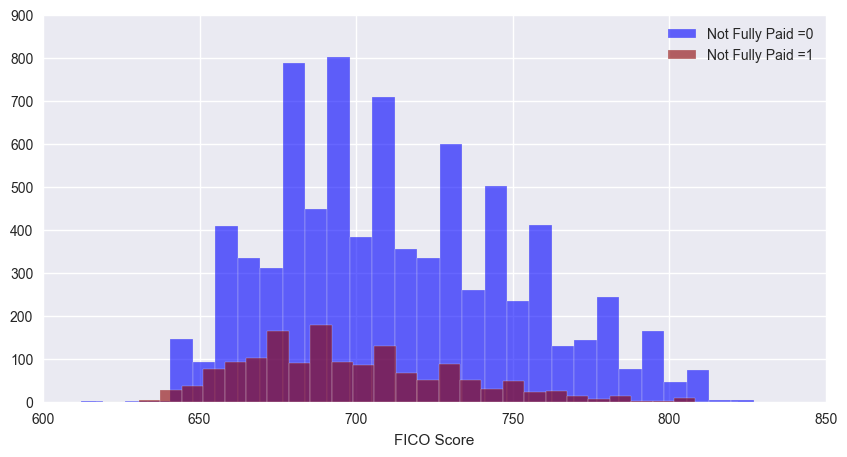

In [36]:
plt.figure(figsize=(9,5))
plt.style.use('seaborn-deep')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.6,color='blue',bins=30,label='Not Fully Paid =0')
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.6,color='darkred',bins=30,label='Not Fully Paid =1')
plt.legend()
plt.xlabel('FICO Score')

The following can be observed:
* The number of cases in which credit was paid is much larger than the not fully paid cases.
* There doesn't seem to be any significant relation between FICO score and loan payment.

** Countplot showing counts of loans by purpose **

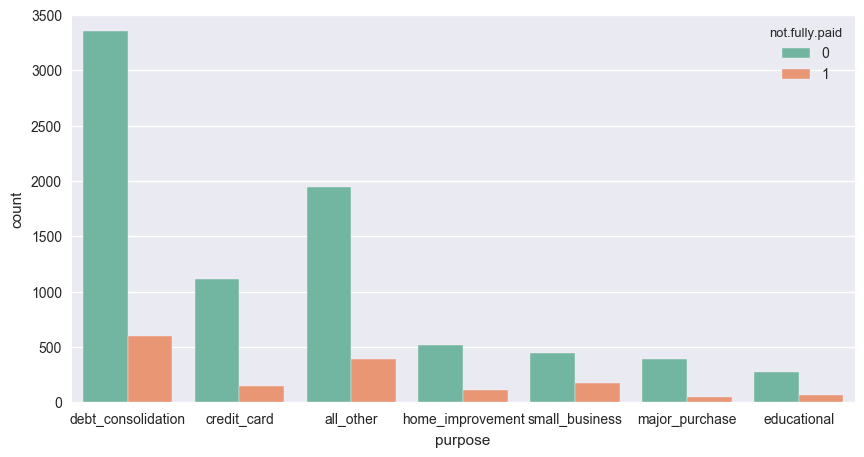

In [35]:
plt.figure(figsize=(9,5))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set2')

The following can be observed:
* Debt consolidation seems to be the most popular reason for wanting a loan 
* Ratio between not fully paid and fully paid seems to be similar between all the reasons.

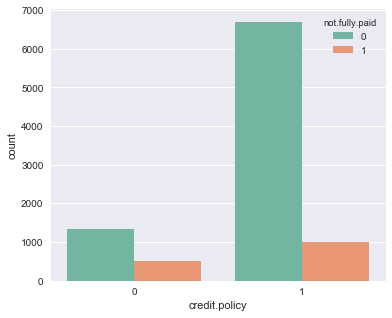

In [8]:
plt.figure(figsize=(6,5))
sns.countplot(x='credit.policy',hue='not.fully.paid',data=loans,palette='Set2')

* It can be observed that a larger proportion of people who did not meet Lending Club's credit policy did not full pay their loans.

** Trend between FICO score and interet rate **

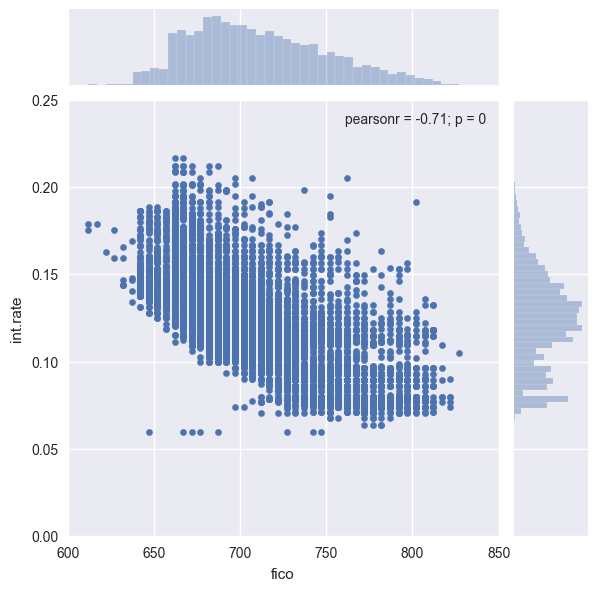

In [42]:
sns.jointplot(x='fico',y='int.rate',data=loans)

* It can be observed that as FICO score increases interest rate decreases.

** Trend between FICO score and interest rate for fully paid and not fully paid loans. ** 

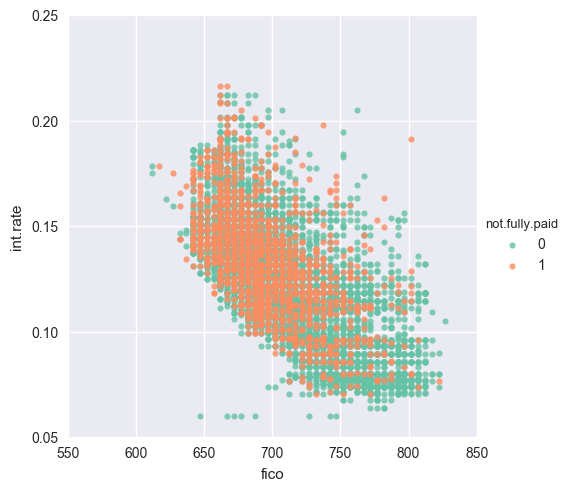

In [47]:
plt.figure(figsize=(9,5))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='not.fully.paid',fit_reg=False,palette='Set2')

* It can be observed that for a higher FICO score and lower interest rate, the instances of not fully paid are fewer.

### Set the Data for predictive analysis.

In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


** Categorical Features ** 

In [11]:
cat_ft = ['purpose']
loans_data = pd.get_dummies(loans,columns=cat_ft,drop_first=True) # drop_first to prevent multi-collinearity
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

** Train-test split **

In [14]:
X= loans_data.drop('not.fully.paid',axis=1)
y=loans_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

** Fit a decision tree classifier and evaluate performance**

In [25]:
dtree = DecisionTreeClassifier()

In [26]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [27]:
predictions = dtree.predict(X_test)

In [28]:
print classification_report(y_test,predictions)

             precision    recall  f1-score   support

          0       0.86      0.83      0.84      2416
          1       0.24      0.28      0.25       458

avg / total       0.76      0.74      0.75      2874



In [29]:
print confusion_matrix(y_test,predictions)

[[2007  409]
 [ 332  126]]


* For a risk averse lender, the recall percentage for the class 1 (Not paid in full) should be the most importnant metric.
* As seen from the classification report the decison tree model only identifies 28% of the cases in the test case where the lender did not pay back in full. 

** Fit a Random Forest Classifer and evaluate performance **

In [35]:
rf = RandomForestClassifier(n_estimators=500,class_weight='balanced')

In [36]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
rf_pred= rf.predict(X_test)

In [38]:
print classification_report(y_test, rf_pred)

             precision    recall  f1-score   support

          0       0.84      1.00      0.91      2416
          1       0.44      0.01      0.02       458

avg / total       0.78      0.84      0.77      2874



* Although the overall performance of the random forest model is slightly better than decsion tree, the recall percentage for Class 1 is very poor. 

** Fit a Logistic Regression Model and evaluate performance **

In [39]:
loans.head(1)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.1,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0


 _Select a new set of features for training._

In [78]:
X1= loans_data[['credit.policy','fico','dti','inq.last.6mths','delinq.2yrs','int.rate']]

_Check for Multi-Collinearity_

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["features"] = X1.columns
vif

,VIF Factor,features
0,7.864884,credit.policy
1,28.489149,fico
2,4.564265,dti
3,2.138926,inq.last.6mths
4,1.126376,delinq.2yrs
5,19.080782,int.rate


_Drop 'int.rate' feature since it is correlated to FICO score_

In [116]:
X1= loans_data[['credit.policy','fico','dti','inq.last.6mths','delinq.2yrs']]
y1=loans_data['not.fully.paid']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25,random_state=100)

In [117]:
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X1_train,y1_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [118]:
log_pred=logmodel.predict(X1_test)
print classification_report(y1_test,log_pred)

             precision    recall  f1-score   support

          0       0.87      0.66      0.75      1987
          1       0.24      0.54      0.33       408

avg / total       0.77      0.64      0.68      2395



* This model performs better than the previous two models since it has a recall percentage of 54% for class 1. 

### Conclusion 

* Data from Lending Club was analyzed with the objective of predicting whether a borrower would pay back the debt based on a number of factors. 
* Three different models were built and their performance was evaluated. Based on an assumption that a lender would want to minimize risk by identifying borrowors who have a higher probability of not paying back in full, the recall value for that class was selected as a primary evaulation metric for the models. 
* Although the overall performance of Random Forest was the best, it did a poor job at predictng the minority class which is our main target. The logistic regression model performed better in this aspect and 55% of cases for the minority class were correctly identified. 
* Further work would include some more feature engineering to gain more information from the data and also application of oversampling/ undersampling to handle imbalance in the classes. 